In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
iris = pd.read_csv(r"C:\Users\RosaS\Desktop\Datasets_Limpios1\iris.csv", header= 0)
df = iris
df.head()

,sepal_lengh,sepal_width,petal_lenght,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
#df.groupby("class").max() - df.groupby("class").min()  #mean
df.groupby("class").count()

,sepal_lengh,sepal_width,petal_lenght,petal_width
class,,,,
Iris-setosa,48,48,48,48
Iris-versicolor,50,50,50,50
Iris-virginica,49,49,49,49


In [52]:
#df[(df["sepal_lengh"] >6.7) & (df["class"] == "Iris-versicolor")]


,sepal_lengh,sepal_width,petal_lenght,petal_width,class
14,5.8,4.0,1.2,0.2,Iris-setosa


In [80]:
pd.get_dummies(df["class"]) #categories x tupla

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [7]:
def drop_duplicatesValues(ds):
    df1=ds
    df1 = df1.drop_duplicates()
    print("copia: ",len(df1), "original:",len(df), "Se eliminaron:", len(df)-len(df1))
    return df1

def drop_naValues(ds):
    ds.dropna(subset= ["petal_lenght"])
    ds.dropna (thresh = 3) # columns(features) required
    return ds

def get_featuresCorrelation(x):
    corr = round(x.corr(),3)
    corrGraphic = corr.style.background_gradient()
    return corrGraphic

def boxplot(x):
    Q1 = np.percentile(x,25)
    Q3 = np.percentile(x,75)
    rangointer = Q3 - Q1
    umbralSuperior = Q3 + 1.5*rangointer
    umbralInferior = Q1 - 1.5*rangointer

    print("Umbral Superior es :",umbralSuperior, "\nUmbral Inferior es: ", umbralInferior)
    np.mean(x < umbralSuperior)
    return df[df['sepal_lengh']  > umbralSuperior]

In [49]:
df = drop_duplicatesValues(df)
df = drop_naValues(df)

x = df.iloc[:,0:4] 
y= df.iloc[:,-1:]

get_featuresCorrelation(x)

copia:  147 original: 147 Se eliminaron: 0


,sepal_lengh,sepal_width,petal_lenght,petal_width
sepal_lengh,1.000000,-0.109000,0.871000,0.817000
sepal_width,-0.109000,1.000000,-0.421000,-0.356000
petal_lenght,0.871000,-0.421000,1.000000,0.962000
petal_width,0.817000,-0.356000,0.962000,1.000000


In [50]:
boxplot(x)

Umbral Superior es : 10.2 
Umbral Inferior es:  -3.3999999999999995


,sepal_lengh,sepal_width,petal_lenght,petal_width,class


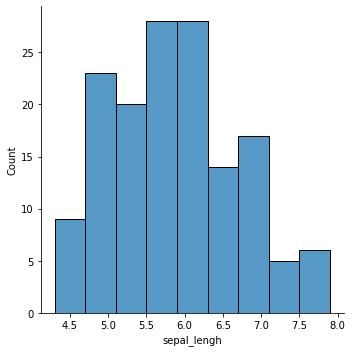

In [290]:
sns.displot(df["sepal_lengh"])

<AxesSubplot:ylabel='Density'>

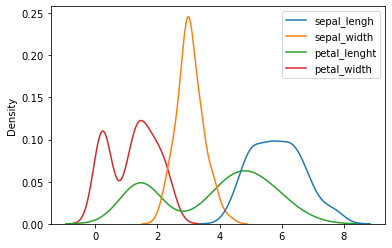

In [56]:
#sns.kdeplot(df["sepal_lengh"])
#sns.kdeplot(df["sepal_width"])
#plt.xlim([-10,10])
sns.kdeplot(data=x)


Mean_dataset: 
 [-4.83362405e-17  1.69176842e-16 -2.41681203e-16 -3.38353684e-16] 

std_dataset: 
 [1. 1. 1. 1.]


<AxesSubplot:ylabel='Density'>

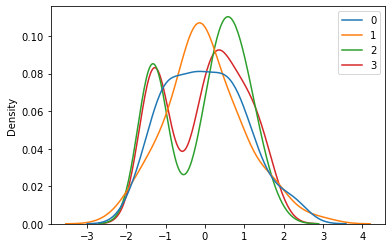

In [78]:
from sklearn import preprocessing

def scale_preprocessing(x):
    X_scaled = preprocessing.scale(x)
    mean_dataset = X_scaled.mean(axis = 0) #0
    std_dataset = X_scaled.std(axis = 0) #1
    print("\nMean_dataset: \n",mean_dataset,"\n\nstd_dataset: \n",std_dataset)
    return X_scaled 
sns.kdeplot(data=scale_preprocessing(x))

<AxesSubplot:ylabel='Density'>

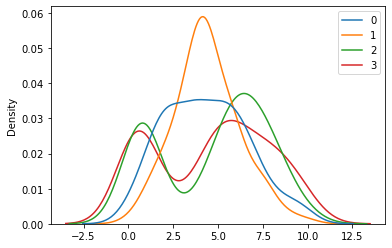

In [79]:
def scale_MinMax(x):
    min_max_scaler = preprocessing.MinMaxScaler([0,10])
    mean_dataset = X_scaled.mean(axis = 0) #0
    std_dataset = X_scaled.std(axis = 0) #1
    X_train_minmax  = min_max_scaler.fit_transform(x)
    return X_train_minmax

sns.kdeplot(data = scale_MinMax(x))

In [116]:
def comparisons_scalers():
    X_scaled = scale_preprocessing(x)
    X_scaled_minmax = scale_MinMax(x)
    print("Scale : ",X_scaled[0])
    print("MinMaxScaler : ",X_scaled_minmax[0])
comparisons_scalers()


Mean_dataset: 
 [-4.83362405e-17  1.69176842e-16 -2.41681203e-16 -3.38353684e-16] 

std_dataset: 
 [1. 1. 1. 1.]
Scale :  [-0.91550949  1.0199714  -1.35773692 -1.33570001]
MinMaxScaler :  [2.22222222 6.25       0.6779661  0.41666667]


In [114]:
from sklearn.cluster  import KMeans
from sklearn.covariance import EllipticEnvelope

def model_Kmeans(X_scaled_minmax):
    X_train = X_scaled_minmax[50:150]  #Train

    kmeans = KMeans(n_clusters = 3, random_state = 0).fit(X_train)
    print("Train_predictions: \n\n",kmeans.labels_)
    unique, counts = np.unique(kmeans.labels_, return_counts=True)
    no_clusters=dict(zip(unique, counts))
    print("\nNo_byCluster: ",no_clusters)
    print("\nKmeans Centroids\n\n",kmeans.cluster_centers_)

    x_test = X_scaled_minmax[0:50]  #Test
    predictions = kmeans.predict(x_test)
    return predictions


def model_EllipticEnvelope(X_scaled_minmax):
    
    X_train = X_scaled_minmax[50:150]  #Train
    elliptic =  EllipticEnvelope (contamination = .01)
    #var_list = ["sepal_lengh","sepal_width","petal_lenght","petal_width"]
    #x = np.array(df.loc[:,var_list].dropna())
    predictions=elliptic.fit(X_train)
    
    #x_test = X_scaled_minmax[0:50]  #Test
    #predictions = elliptic.predict(x_test)
    return predictions

def anomalous_rows(pred):
    outliers = np.where(pred == -1) [0]
    rows_anomalous = df.loc[outliers]
    return rows_anomalous

In [115]:
X_scaled_minmax = scale_MinMax(x) #get dataset scaled
pred = model_EllipticEnvelope(X_scaled_minmax)
anomalous_rows(pred)

,sepal_lengh,sepal_width,petal_lenght,petal_width,class
